# Perceptrons
You should build an end-to-end machine learning pipeline using a perceptron model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [7]:
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.preprocessing
import numpy as np
import matplotlib.pyplot as plt    ## to plot the data
import seaborn as sns
import sklearn.tree
from sklearn.linear_model import Perceptron
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC          ## training the model with svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
     ## evaluate the accuracy of the model


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv")
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df size:", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:" ,df_test.shape)

df size: (4000, 786)
df_train size: (3000, 786)
df_test size: (1000, 786)


In [ ]:
Data Exploration

In [8]:
x = df.drop("class", axis = 1)
y = df["class"]

print("Shape of x is", x.shape)
print("shape of y is", y.shape)

Shape of x is (4000, 785)
shape of y is (4000,)


Missing values 0


<ipython-input-9-5469a01c79e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['class'], palette = 'dark')


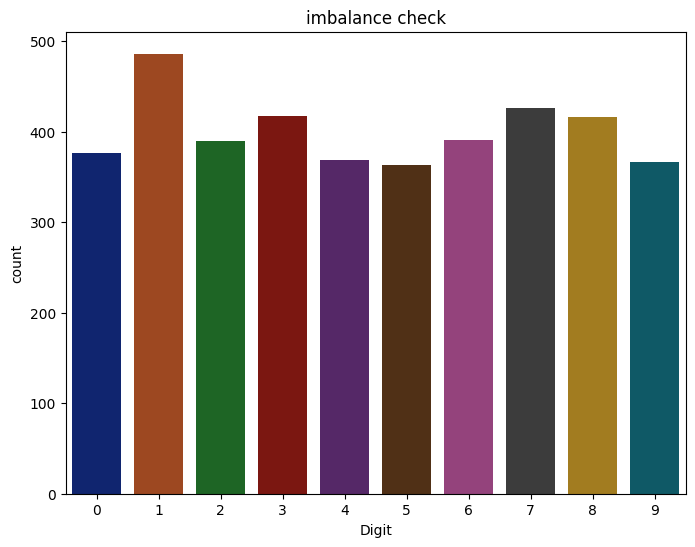

                 id        class  pixel1  pixel2  pixel3  pixel4  pixel5  \
count   4000.000000  4000.000000  4000.0  4000.0  4000.0  4000.0  4000.0   
mean   34415.179250     4.439500     0.0     0.0     0.0     0.0     0.0   
std    20508.890104     2.879655     0.0     0.0     0.0     0.0     0.0   
min       17.000000     0.000000     0.0     0.0     0.0     0.0     0.0   
25%    16575.750000     2.000000     0.0     0.0     0.0     0.0     0.0   
50%    34435.500000     4.000000     0.0     0.0     0.0     0.0     0.0   
75%    52111.500000     7.000000     0.0     0.0     0.0     0.0     0.0   
max    69998.000000     9.000000     0.0     0.0     0.0     0.0     0.0   

       pixel6  pixel7  pixel8  ...     pixel775     pixel776     pixel777  \
count  4000.0  4000.0  4000.0  ...  4000.000000  4000.000000  4000.000000   
mean      0.0     0.0     0.0  ...     0.076750     0.015250     0.013000   
std       0.0     0.0     0.0  ...     2.616022     0.964495     0.822192   
min    

In [9]:
print ( "Missing values", df.isnull().sum().sum())
plt.figure(figsize=(8, 6))
sns.countplot(x=df['class'], palette = 'dark')
plt.title("imbalance check")
plt.xlabel("Digit")
plt.ylabel("count")
plt.show()
print(df.describe())

In [10]:
scaler = StandardScaler()

x_train = df_train.drop("class", axis=1)
x_test = df_test.drop("class", axis=1)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

x_train size: (3000, 785)
y_train size: (3000,)
x_test size: (1000, 785)
y_test size: (1000,)


Training the model


In [12]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform (x_test)

In [13]:
pcn = Perceptron()
pcn.fit(x_train, y_train)

Perceptron()

In [15]:
pcn.score(x_test, y_test)

0.823

In [16]:
pcn.score(x_train, y_train)

0.984